In [12]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets


# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### KNN Regression으로 50cm 생선의 무게 예측

#### Train, Test

In [3]:
train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=42)

In [4]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### KNN Regression Model

In [5]:
# 이웃의 개수를 3으로 선택
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

In [7]:
# 기존 데이터로 무게 확인
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i],v)

[43.] 1100.0
[42.] 1100.0


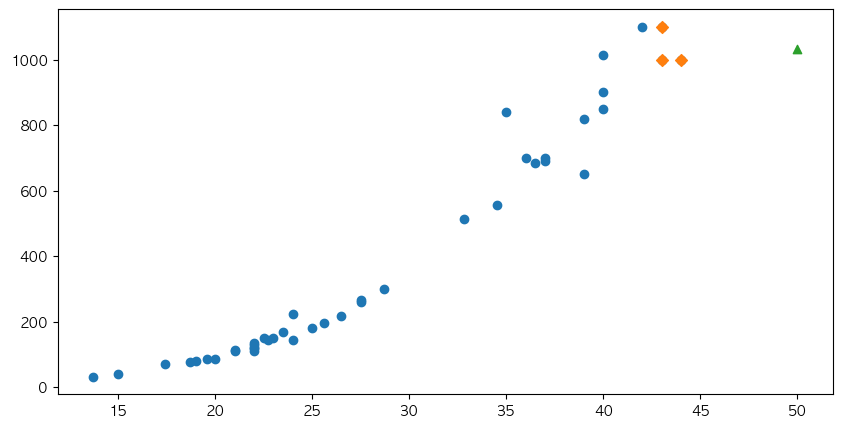

In [9]:
# 산점도로 이웃을 구해서 확인하자
# 50cm 생선의 이웃을 구하자
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(10, 5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 생성 데이터
plt.scatter(50, 1033, marker='^')

plt.show()

In [10]:
# 이웃들의 평균값
np.mean(train_target[indexes])

1033.3333333333333

In [11]:
knr.predict([[100]])

array([1033.33333333])

---
### 선형회귀(Linear Regression)     
: 직선이나 곡선의 함수식(방정식)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [13]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [14]:
lr.predict([[50]])

array([1241.83860323])

In [15]:
# Y = aX + b에서 기울기와 절편값을 출력(Deep Learning에서는 Weight와 Bias로 불림)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [16]:
# 기울기와 절편값으로 계산
39.01714496 * 50 -709.0186449535474

1241.8386030464528

### 산점도 그려보기

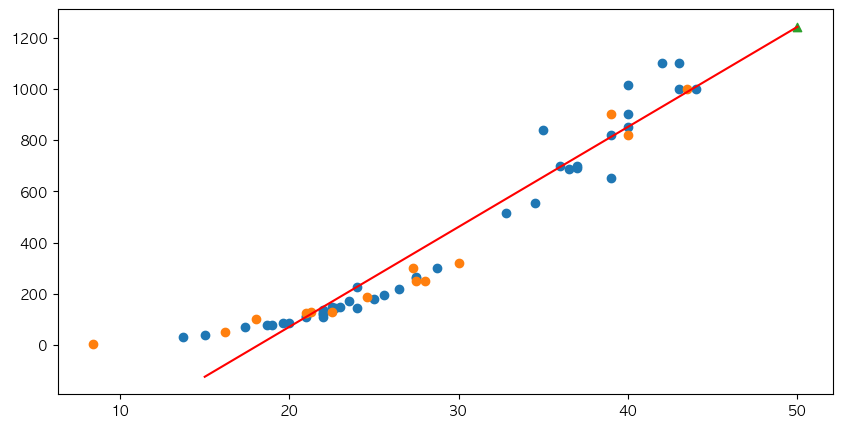

In [32]:
# 훈련세트의 산점도
plt.figure(figsize=(10, 5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_], c='red')

# 50cm 생선
plt.scatter(50, (39.01714496 * 50 -709.0186449535474), marker='^')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수일 경우가 발생할 수 있다. (절편이 음수)

### 과대적합과 과소적합 확인

In [31]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


---
### 다항 회귀
$y = a x^2 + bx + c$
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀 하고 한다.

In [34]:
# Feature를 제곱한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [35]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [38]:
# 50cm 생성
lr.predict([[50**2, 50]])

array([1573.98423528])

In [39]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


### 산점도 그리기

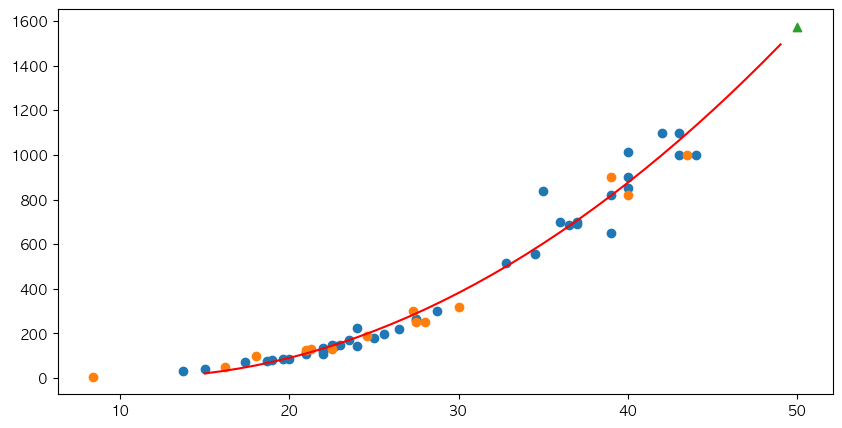

In [43]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련세트의 산점도
plt.figure(figsize=(10, 5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot(point, (1.01433211 * point**2 - 21.55792498 * point + 116.05021078278338), c='red')

# 50cm 생선
plt.scatter(50, 1573.98423528, marker='^')

plt.show()

In [44]:
# 과대적합과 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


> 약간의 과소적합이 발생하지만 단순회귀 보다는 다향회귀가 진전이 있었다.